# PHYS 381 - Assignment #2  
#### January 29, 2018
John Ming Ngo (30020834)

Kenneth Barry Sharman (00300185)

### 1) Use numpy.polynomial.legendre to generate a single plot showing the first five Legendre polynomials  with order from $N=1$ up to and including $N=5$ between $x=−1$ and $x=+1$

In [1]:
import scipy.optimize as opt
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

First we define a function that will place objects of type Legendre into a numpy array. Each element of the array holds the unevaluated legendre function of a specific degree.

In [46]:
def genLegPoly(degree):
    """
    Function generates legendre polynomial objects from 1 
    to the specified degree. Each object is successively 
    added to an array, which is returned by the function. 
    
    Params:
        degree: Highest degree of legendre polynomial added 
        to array
    Returns:
        lPolys: A list of Legendre Polynomial Objects 
        with degrees from 1 to the degree specified.
    """
    lPolys = []    
    coeffList = np.array([1])
    for i in range(degree):
        coeffList = np.insert(coeffList,0,0)
        y = np.polynomial.legendre.Legendre(coeffList)
        lPolys = np.append(lPolys,y)
    return lPolys

Next, we create a function that creates a visually appealing plot with legendre polynomials up to a specified degree. Since all degrees of legendre polynomial are defined in the interval [-1,1], the x-values of the plot are built into the function. 

In [47]:
def createLegendrePlot(degree):
    """
    This function, given an input degree, plots legendre
    polynomials from degree zero to that degree. Plot has customized
    size, limits, grid, x-axis labels, title, and legend.
    
    Params:
        degree: How high a degree of legendre polynomials
        you want generated.
    """
    # Set the plot size
    plt.figure(figsize=(10,5))
    
    # Intialize x-values for plot
    x = np.arange(-1,1,0.01)
    
    # The legendre function is evaluated, and plotted, against the set x-values for
    # each degree. A labelled is given to each function in order to indicate in legend. 
    for i in range(degree):
        curve = "N=" + str(i+1)
        plt.plot(x,genLegPoly(degree)[i](x), label = curve)
     
    # For degree less than 10: Add legend to upper left corner, with a shadow, grey in 
    # color, and semi-transparent. The number of elements in the legend is restricted in 
    # order to ensure that the output to reasonable.
    if degree<10:
        legend = plt.legend(loc='upper left', shadow=(True))
        frame = legend.get_frame()
        frame.set_facecolor('#f9f9f9')
        frame.set_alpha(0.6)
    
    # Add grid with solid lines to graph
    plt.grid(linestyle='dashed')

    # Set x and y axis range
    plt.xlim(-1, 1)
    plt.ylim(-1, 1)

    # Label vertical & horizontal axis and add graph title.
    plt.xlabel('x-values')
    plt.ylabel('$P_{n}(x)$')
    plt.title('Legendre Polynomials of Degrees 0 to %i' % degree)

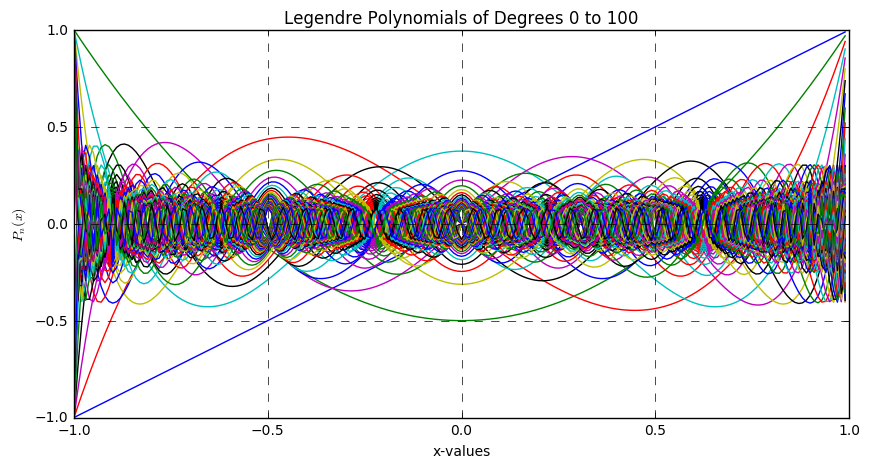

In [50]:
# Call above function to display plot of legendre polynomials
createLegendrePlot(100)

### 2) Use scipy.optimize.brentq to find all of the zeros of the Legendre polynomials with order from $N=1$ up to and including $N=5$.

We will use brentq to determine the roots of legendre polynomials, which can be generated using the function genLegPoly froom question #1.

In [88]:
#Question 2
def evalLegendre(x, degree):
    """
    This function is a helper function whic
    """
    degreeList = [0]*degree + [1]
    return np.polynomial.legendre.legval([x], degreeList)[0]

def evalLegendreDegree(degree):
    return lambda x: evalLegendre(x, degree)

In [89]:
def getAllRoots(func, a, b, numOfDivisions, brentq = True, secantDecimals = 5):
    roots = []
    xRangeIntervals = np.linspace(a, b, numOfDivisions, endpoint = True)
    for numOfIntervals in range(1, len(xRangeIntervals)):
        if brentq:
            try:
                roots.append(opt.brentq(func, xRangeIntervals[numOfIntervals-1], xRangeIntervals[numOfIntervals]))
            except:
                pass
        else:
            newValue = round(secantRootFinder(func, xRangeIntervals[numOfIntervals-1], xRangeIntervals[numOfIntervals]), secantDecimals)
            roots.append(newValue)
            roots = list(set(roots))
            roots.sort()
    return roots

In [90]:
legendreFunctions = []
for degree in range(1, 10):
    legendreFunctions.append(evalLegendreDegree(degree))

currentDegree = 1
for function in legendreFunctions:
    print("Current Degree's:", currentDegree, ", Roots:", getAllRoots(function, -1, 1, 100))
    currentDegree+=1

Current Degree's: 1 , Roots: [0.0]
Current Degree's: 2 , Roots: [-0.5773502691896016, 0.5773502691896016]
Current Degree's: 3 , Roots: [-0.7745966692414834, 0.0, 0.7745966692414834]
Current Degree's: 4 , Roots: [-0.8611363115940526, -0.3399810435847288, 0.3399810435847288, 0.8611363115940526]
Current Degree's: 5 , Roots: [-0.9061798459386241, -0.5384693101053333, 0.0, 0.5384693101053333, 0.9061798459386241]
Current Degree's: 6 , Roots: [-0.9324695142031519, -0.6612093864662645, -0.2386191860831491, 0.2386191860831491, 0.6612093864662645, 0.9324695142031519]
Current Degree's: 7 , Roots: [-0.9491079123427585, -0.7415311855993943, -0.4058451513771931, 0.0, 0.4058451513771931, 0.7415311855993943, 0.9491079123427585]
Current Degree's: 8 , Roots: [-0.9602898564975327, -0.7966664774132136, -0.525532409916329, -0.1834346424956892, 0.1834346424956892, 0.525532409916329, 0.7966664774132136, 0.9602898564975327]
Current Degree's: 9 , Roots: [-0.9681602395076262, -0.8360311073266358, -0.61337143270

### 3) Write a function to find zeros using the "secant method".  This is very similar to Newton's method, but uses a discrete estimate for the derivative.

In [97]:
def secantRootFinder(function, xBegin, xEnd, yTolorance = 1e-12, maxIter = 100):
    """
    Function tries to find a root of a function, in a specific interval.
    The secant method is employed to estimate the root, by assuming the 
    function is linear in the interval in question. x-y coordinates of
    root are displayed once the function value is within the tolerance 
    range specified.
    
    Params:
        function: Unevaluated function
        xBegin: Start of interval to be analyzed
        xEnd: End of interval to be analyzed
        yTolerance: Zero interval precision range
        maxIter: Maximum number of iterations before declaring failure.
    """
    # Determine function value at endpoint of interval in question.
    yCheck = abs(function(xEnd))
    
    # Loop runs until the function value lies within the zero range as
    # specified by the yTolerance variable. Root and function value are
    # displayed.
    loopNumber = 0
    while yCheck >= yTolorance and loopNumber < maxIter:
        xOld = xEnd
        xEnd = xEnd - function(xEnd) * (xEnd-xBegin) / (function(xEnd)-function(xBegin))
        xBegin = xOld
        yCheck = abs(function(xEnd))
        loopNumber += 1
    if loopNumber == maxIter:
        return np.nan
    return xEnd

### 4) Apply your secant method function to find the roots of a Legendre polynomial for $N=5$.
We will create a function that determines the roots of a particular function, within a range which is specified by an array of x-values.

### Note:
This function was implemented as #5 originally called for the use of secantRootFinder. It specifically manipulates an array in such a way that can be used for the endpoints of an interval.

In [99]:
# Divide the interval [-1,1] into 10 sub-intervals and check for 
# roots using secantRootFinder
#Question 4
legendreDegree5 = evalLegendreDegree(5)
print(getAllRoots(legendreDegree5, -1, 1, 10, False))

[-0.90617999999999999, -0.53847, 0.0, 0.53847, 0.90617999999999999]


For N=5 we see that both the findLegRoots and the secantRootFinder both found the roots expected from the graph in question #1. It should be noted that the secantRootFinder was able to narrow down the root values to a much smaller tolerance than that of the findLegRoots function. Using both these functions gives us a better understanding of the factors involved when determining the value of a function as evaluated by a computer. 

### 5) Apply the scipy.optimize.newton method function to the “myfunc” function. Use a range of different starting points as given by x = np.linspace(-1.0, 10.0, 101) and find the resulting roots. Discuss your results

In [23]:
# Function defined in the class notes
def myfunc(x, b=0.4):
    return b*x - np.tan(x)

In [51]:
def newtonZeros(x, function, numOfDecimals = 5):
    '''
    Function applies newton method to a function to find roots
    in specified x range. Once a root is found it is added to 
    a list, which is returned by the function.
    
    Params:
        x: Array of x-values.
        function: Roots of this function are found in the interval
        specified by the x-values.
        numOfDecimals: Decimal precision to which roots are found.
    Returns:
        zeroList: A list containing all zeros found.
    '''
    # Create empty list for which roots are appended.
    zeroList = []
    for element in x:
        try:
            xzero = round(opt.newton(function, element, fprime=None, args=(), tol=1.48e-08, maxiter=50, fprime2=None), numOfDecimals)
            zeroList.append(xzero)
        except:
             pass
    zeroList = np.unique(zeroList)
    return zeroList

In [52]:
# newtonZeros is called for myfunc in the interval [-1,10].
# Roots found are presented in a format display.
x = np.linspace(-1.0, 10.0, 101)
xzeros = newtonZeros(x, myfunc)
for entry in xzeros:
    print('Root: x = %5.2f'% entry)

Root: x = -4.17
Root: x =  0.00
Root: x =  4.17
Root: x =  7.53


We see, with random repetition, that the zeros of myfunc on [-1,10] are: 
x=0, x=4.17, x=7.53

This data is a bit overwhelming, as the roots are repeated many times. Furthurmore, the findings jump from one value to another, with no apparent pattern. This is due to the secent method itself- clearly indicating the start point will not necessarily always yield the closest root. Finally, we see that the negative root, -4.17. This is again due to the nature in which the secant method performs its analysis. 

A better way to analyze the results may be to compare the roots we found with a quick plot of the myfunc function on the interval [-1,10] with these roots superimposed. To do so we will create a plotting function.

In [14]:
def myFuncPlot():
    '''
    Function plots myfunc from [-1,10] and superimposes a
    scatterplot of the roots using the newtonZeros function.
    '''
    # Set the plot size
    plt.figure(figsize=(14,9))
    
    # Create x-values for the interval [-2,10]
    x = np.linspace( -2, 10, 500)
    
    # Evaluate myfunc at x-values
    y = myfunc(x)
    
    # Disregard values < -20 for plot as to
    # eliminate the asymptotic portion of curve
    y[ y < -20 ] = np.nan
    
    # Add x and y-axis to the plot
    plt.axhline(y=0, color='k')
    plt.axvline(x=0, color='k')
    
    # Plot myfunc function in green
    plt.plot( x, y, 'g', label="$y=myfunc(x)$")
    
    # Plot vertical lines for root values determined form
    # newtonZeros results
    plt.plot([0]*2, [-10,10],'--', label="$x=0.00$")
    plt.plot([4.17]*2, [-10,10], 'r--', label="$x=4.17$")
    plt.plot([7.53]*2, [-10,10],'--', label="$x=7.53$")
    
    # Plot the list of roots generated form newtonZeros function
    plt.scatter(xzeros, np.zeros(len(xzeros)), marker='D', color='#9B30FF', label="$Roots$")

    # Add title, axis labels, set plot limits, and add legend
    plt.title('myfunc Graph with Calculated Roots')
    plt.xlabel('x (radians)')
    plt.ylabel('y ()')
    plt.xlim( -2, 10 )
    plt.ylim( -10, 10 )
    plt.grid(linestyle='dashed')
    plt.legend(loc='upper right')

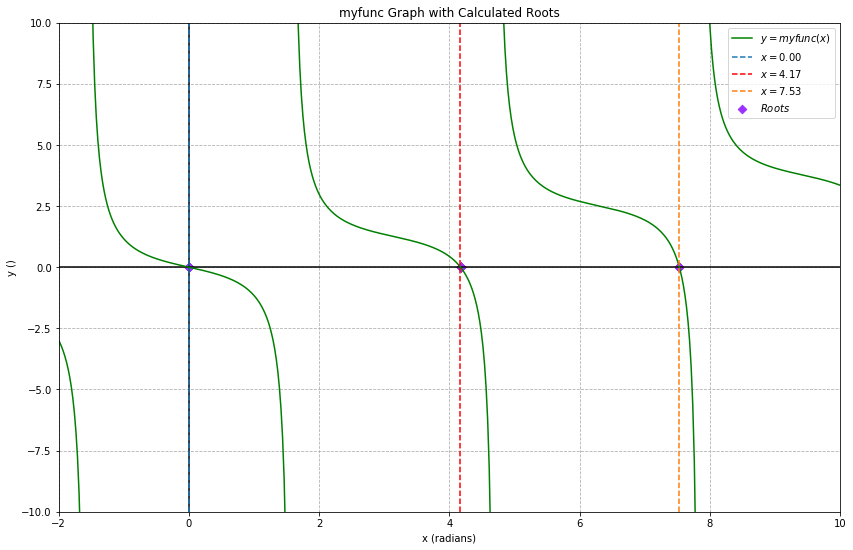

In [15]:
# Call plotting function defined above
myFuncPlot()

It appears from this plot that x=0 x=4.17 and x=7.53 are indeed all the roots of myfunc on the interval [-1,10].

Thus, we are able to conclude that the secant method was able to correctly identify the roots of the myfunc function. This exercise highlights the areas that must be taken into consideration when setting out to determine the value of a function, when represented on a computer. Furthuremore, it is essential to properly interpret the results of such calculations.